### Prerequisitos

Instalación de las librerias base para la ejecucion de Modelo

* opencv-python
* imgaug
* keras-segmentation

In [1]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python
#!pip install albumentations
#!pip install imgaug==0.2.7
#!pip install keras-segmentation
!pip install keras-segmentation==0.3.0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
libxrender-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     |████████████████████████████████| 3.3MB 10.1MB/s 
  Created wheel for keras-segmentation: filename=keras_segmentation-0.3.0-cp36-none-any.whl size=29072 sha256=5308842721639e1861af5e69e51aa8fc5cc0e76a673945c32d50ef7d42e9371d
  Stored in directory: /root/.cache/pip/wheels/d0/bb/c0/6aad88b38f6e46db048bed4cccb904a5897055a8ab6fbd4dfc
Successfully built keras-segmentation
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found

### Ejemplo de Implementación (Red Pre-Entrenado)

Para este ejemplo se utilizará la red pre-entrenada [PSPNet](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html]), usando como dataset [Pascal VOC 2012](http://host.robots.ox.ac.uk/pascal/VOC/voc2007/).

In [2]:
# Ejemplo tomado de: https://github.com/divamgupta/image-segmentation-keras#pre-trained-models
from keras_segmentation.pretrained import pspnet_101_voc12

model = pspnet_101_voc12()

model.summary()


Using TensorFlow backend.


264151040/264149344 [==============================] - 15s 0us/step
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 473, 473, 3)  0                                            
__________________________________________________________________________________________________
conv1_1_3x3_s2 (Conv2D)         (None, 237, 237, 64) 1728        input_1[0][0]                    
__________________________________________________________________________________________________
conv1_1_3x3_s2_bn (BatchNormali (None, 237, 237, 64) 256         conv1_1_3x3_s2[0][0]             
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 237, 237, 64) 0           conv1_1_3x3_s2_bn[0][0]          
________________________

In [3]:
# Ejecutamos el modelo
out = model.predict_segmentation(
    inp="moto_gp_01.jpg",
    out_fname="out.png"
)


A continuación se muestra la imágen original y la imágen segmentada.

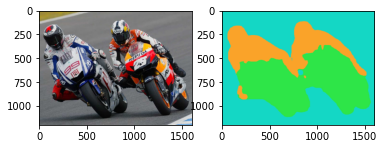

In [5]:
# Tomado de Clase
import numpy as np
import cv2 
import matplotlib.pyplot as plt
# moto_gp_01.jpg
img1 = cv2.imread(r"moto_gp_01.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread(r"out.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img1)
f.add_subplot(1,2, 2)
plt.imshow(img2)
plt.show(block=True)

### Entrenamiento de la Red Neuronal (vgg_unet)

* Se utilizara el [dataset1](https://drive.google.com/file/d/0B0d9ZiqAgFkiOHR1NTJhWVJMNEU/view?usp=sharing) que tiene imagenes etiquetadas
* El codigo de entrenamiento se ha tomado de [A Beginner's guide to Deep Learning based Semantic Segmentation using Keras](https://divamgupta.com/image-segmentation/2019/06/06/deep-learning-semantic-segmentation-keras.html)

In [ ]:
#Descomprimimos el Dataset
!unzip dataset1.zip

In [12]:
# Ejecutamos el entrenamient del modelo
from keras_segmentation.models.unet import vgg_unet

model = vgg_unet(n_classes=51 ,  input_height=416, input_width=608  )

model.train(
    train_images =  "dataset1/images_prepped_train/",
    train_annotations = "dataset1/annotations_prepped_train/",
    checkpoints_path = "/tmp/vgg_unet_ds1" , 
    epochs=5,
    optimizer_name='adagrad' # adagrad, adadelta
)


58892288/58889256 [==============================] - 3s 0us/step


  5%|▌         | 19/367 [00:00<00:01, 185.09it/s]

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 181.18it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - 154s 301ms/step - loss: 0.9519 - accuracy: 0.7262
saved  /tmp/vgg_unet_ds1.0
Epoch 2/5
512/512 [==============================] - 144s 282ms/step - loss: 0.6239 - accuracy: 0.8044
saved  /tmp/vgg_unet_ds1.1
Epoch 3/5
512/512 [==============================] - 144s 281ms/step - loss: 0.4925 - accuracy: 0.8465
saved  /tmp/vgg_unet_ds1.2
Epoch 4/5
512/512 [==============================] - 144s 281ms/step - loss: 0.4148 - accuracy: 0.8709
saved  /tmp/vgg_unet_ds1.3
Epoch 5/5
512/512 [==============================] - 144s 281ms/step - loss: 0.3607 - accuracy: 0.8875
saved  /tmp/vgg_unet_ds1.4


In [13]:
!pip install opencv-python

# Tomado de Clase
import numpy as np
import cv2 
import matplotlib.pyplot as plt

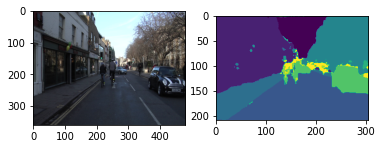

In [14]:
# Probamos el modelo con una imagen
import matplotlib.pyplot as plt
out = model.predict_segmentation(
    inp="dataset1/images_prepped_test/0016E5_07965.png",
    out_fname="out2.png"
)
#Tomado de clase
img2 = cv2.imread(r"dataset1/images_prepped_test/0016E5_07965.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#plt.imshow(out)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img2)
f.add_subplot(1,2, 2)
plt.imshow(out)
plt.show(block=True)

In [ ]:
# Evaluamos el modelo
print(model.evaluate_segmentation( inp_images_dir="dataset1/images_prepped_test/"  , annotations_dir="dataset1/annotations_prepped_test/" ) )

101it [00:17,  5.77it/s]

{'frequency_weighted_IU': 0.7919015920598266, 'mean_IU': 0.10956853658512279, 'class_wise_IU': array([0.93296491, 0.81773506, 0.02054059, 0.94877931, 0.79871486,
       0.77466614, 0.11113716, 0.22233339, 0.4824478 , 0.19285504,
       0.12041991, 0.1654012 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        ])}


In [ ]:
!mkdir imagesTr
!mkdir labelsTr

In [ ]:
#%cd imagesTr
#!pwd

!unrar e imagesTr.rar 

In [ ]:
#%cd /content/labelsTr
#!pwd
#!unrar e labelsTr.rar
#%cd ..

/content


In [ ]:
# Ejecutamos el entrenamient del modelo
from keras_segmentation.models.unet import vgg_unet

modelmask = vgg_unet(n_classes=3 ,  input_height=416, input_width=608  )

modelmask.train(
    train_images =  "imagesTr/",
    train_annotations = "labelsTr/",
    checkpoints_path = "/tmp/vgg_unet_1" , 
    auto_resume_checkpoint=True,
    epochs=20,
    verify_dataset=False,
    optimizer_name='adagrad' # adagrad, adadelta
)

Epoch 1/20
512/512 [==============================] - 309s 604ms/step - loss: 0.3107 - accuracy: 0.9231
saved  /tmp/vgg_unet_1.0
Epoch 2/20
512/512 [==============================] - 304s 594ms/step - loss: 0.2106 - accuracy: 0.9460
saved  /tmp/vgg_unet_1.1
Epoch 3/20
512/512 [==============================] - 304s 593ms/step - loss: 0.1794 - accuracy: 0.9493
saved  /tmp/vgg_unet_1.2
Epoch 4/20
512/512 [==============================] - 304s 593ms/step - loss: 0.1604 - accuracy: 0.9501
saved  /tmp/vgg_unet_1.3
Epoch 5/20
512/512 [==============================] - 303s 593ms/step - loss: 0.1467 - accuracy: 0.9494
saved  /tmp/vgg_unet_1.4
Epoch 6/20
512/512 [==============================] - 304s 593ms/step - loss: 0.1294 - accuracy: 0.9536
saved  /tmp/vgg_unet_1.5
Epoch 7/20
512/512 [==============================] - 304s 593ms/step - loss: 0.1246 - accuracy: 0.9554
saved  /tmp/vgg_unet_1.6
Epoch 8/20
512/512 [==============================] - 304s 593ms/step - loss: 0.1137 - accuracy: 

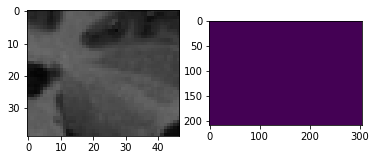

In [ ]:
# Probamos el modelo con una imagen
!pip install opencv-python

# Tomado de Clase
import numpy as np
import cv2 
import matplotlib.pyplot as plt

out = modelmask.predict_segmentation(
    inp="hippocampus_002.ni_z033.png",
    out_fname="out3.png"
)
#Tomado de clase
img2 = cv2.imread(r"hippocampus_002.ni_z033.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#plt.imshow(out)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img2)
f.add_subplot(1,2, 2)
plt.imshow(out)
plt.show(block=True)

In [ ]:
!apt-get install rar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  rar
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 295 kB of archives.
After this operation, 799 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/multiverse amd64 rar amd64 2:5.5.0-1 [295 kB]
Fetched 295 kB in 0s (3,261 kB/s)
Selecting previously unselected package rar.
(Reading database ... 144465 files and directories currently installed.)
Preparing to unpack .../rar_2%3a5.5.0-1_amd64.deb ...
Unpacking rar (2:5.5.0-1) ...
Setting up rar (2:5.5.0-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!rar a "vgg_unet_1.0.rar" "/tmp/vgg_unet_1.0"


RAR 5.50   Copyright (c) 1993-2017 Alexander Roshal   11 Aug 2017
Trial version             Type 'rar -?' for help

Evaluation copy. Please register.

Creating archive vgg_unet_1.0.rar

Adding    /tmp/vgg_unet_1.0                                                8% 16% 25% 33% 42% 50% 59% 67% 76% 84% 93%100%  OK 
Done


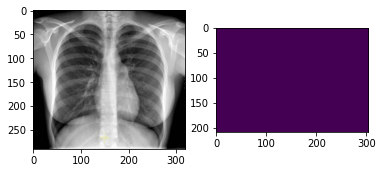

In [ ]:
# Probamos el modelo con una imagen
!pip install opencv-python

# Tomado de Clase
import numpy as np
import cv2 
import matplotlib.pyplot as plt

out = modelmask.predict_segmentation(
    inp="radiografia-torax-320x291-320x291.jpg",
    out_fname="outdata.jpg"
)
#Tomado de clase
img2 = cv2.imread(r"radiografia-torax-320x291-320x291.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
#plt.imshow(out)

f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img2)
f.add_subplot(1,2, 2)
plt.imshow(out)
plt.show(block=True)